<a href="https://colab.research.google.com/github/uncertainity/Pursuit-Curve/blob/main/De_using_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam


In [2]:
input_shape = (1,)
N = tf.keras.Sequential([
                             tf.keras.layers.Dense(50,input_shape = input_shape),
                             tf.keras.layers.Activation("sigmoid"),
                             tf.keras.layers.Dense(1)
])

In [3]:
N(tf.ones(1))
N.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                100       
                                                                 
 activation (Activation)     (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [90]:
A = 1
psi_t = lambda x: A + x*tf.squeeze(N(x))

In [91]:
#f = lambda x, psi: tf.math.exp(-x/5.0)*tf.math.cos(x) - psi/5.0
f = lambda x: 2*x

In [6]:
psi_h = lambda x: tf.math.cos(x)

In [92]:
x = np.linspace(0, 2, 100)
x = tf.cast(x,dtype = tf.float32)
print(x.shape)

(100,)


In [94]:
psi = psi_t(x)
print(psi.shape)
f_x = f(x)
print(f_x.shape)

(100,)
(100,)


In [99]:
def loss(y_true,y_pred):
  
  with tf.GradientTape() as tape:
    tape.watch(y_true)
    psi_t_x = psi_t(y_true)
    f_x = f(y_true)  
  dx_psi_t_x = tape.gradient(psi_t_x,y_true)
  return tf.sqrt(tf.reduce_mean((dx_psi_t_x - f_x)**2)) 

In [97]:
x = np.linspace(-1, 1, 10)
x = tf.cast(x,dtype = tf.float32)
y = x

In [35]:
print(x.shape)

(100,)


In [98]:
learning_rate = 0.01
training_steps = 5000
batch_size = 100
display_step = 500

In [100]:
optimizer = tf.optimizers.SGD(learning_rate = learning_rate)
rms = tf.keras.optimizers.RMSprop(learning_rate = 0.01)
adam = tf.keras.optimizers.Adam(learning_rate = 0.01)
N.compile(optimizer=optimizer,loss=loss,metrics = [tf.keras.metrics.MeanSquaredError()])

In [102]:
history = N.fit(x,y,epochs = training_steps)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 8ms/step - loss: 1.6432 - mean_squared_error: 0.4124
Epoch 2502/5000
1/1 [==============================] - 0s 7ms/step - loss: 1.6430 - mean_squared_error: 0.4215
Epoch 2503/5000
1/1 [==============================] - 0s 18ms/step - loss: 1.6428 - mean_squared_error: 0.4124
Epoch 2504/5000
1/1 [==============================] - 0s 17ms/step - loss: 1.6427 - mean_squared_error: 0.4215
Epoch 2505/5000
1/1 [==============================] - 0s 9ms/step - loss: 1.6425 - mean_squared_error: 0.4124
Epoch 2506/5000
1/1 [==============================] - 0s 15ms/step - loss: 1.6424 - mean_squared_error: 0.4214
Epoch 2507/5000
1/1 [==============================] - 0s 9ms/step - loss: 1.6422 - mean_squared_error: 0.4123
Epoch 2508/5000
1/1 [==============================] - 0s 10ms/step - loss: 1.6421 - mean_squared_error: 0.4214
Epoch 2509/5000
1/1 [==============================] - 0s 9ms/step - loss

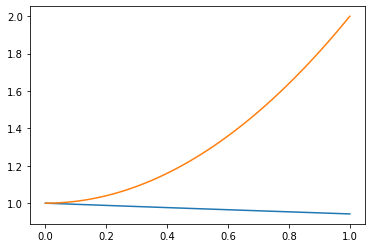

In [105]:
def true_solution(x):
  return x**2 + 1
X = np.linspace(0, 1, 100)
for i in X:
  result = psi_t(X)
S = true_solution(X)
plt.plot(X, result)
plt.plot(X, S)
plt.show()

In [52]:
x = np.linspace(0,2,20)

In [56]:
yt = np.exp(-x / 5.0) * np.sin(x)
ya = tf.squeeze(N(x))
print(yt.shape)
print(ya.shape)


(20,)
(20,)


In [61]:
import pandas as pd
ar = np.vstack((yt,ya,np.abs(yt-ya))).transpose()
df = pd.DataFrame(ar)

In [62]:
df

,0,1,2
0,0.000000,0.039638,0.039638
1,0.102880,0.039196,0.063684
2,0.200358,0.038673,0.161686
3,0.291559,0.038075,0.253484
4,0.375712,0.037411,0.338301
5,0.452160,0.036686,0.415474
6,0.520359,0.035908,0.484450
7,0.579879,0.035084,0.544795
8,0.630408,0.034221,0.596187
9,0.671747,0.033324,0.638422


In [63]:
f0 = 1
inf_s = np.sqrt(np.finfo(np.float32).eps)
learning_rate = 0.01
training_steps = 5000
batch_size = 100
display_step = 500

In [65]:
n_input = 1
n_hidden_1 = 32
n_hidden_2 = 32
n_output = 1

In [68]:
weights = {
    "h1":tf.Variable(tf.random.normal([n_input,n_hidden_1])),
    "h2":tf.Variable(tf.random.normal([n_hidden_1,n_hidden_2])),
    "out":tf.Variable(tf.random.normal([n_hidden_2,n_output]))
}

biases = {
    "b1":tf.Variable(tf.random.normal([n_hidden_1])),
    "b2":tf.Variable(tf.random.normal([n_hidden_2])),
    "out":tf.Variable(tf.random.normal([n_output]))
}

optimizer = tf.optimizers.SGD(learning_rate = learning_rate)

In [86]:
def multilayer_perceptron(x):
  x = np.array([[[x]]],dtype = np.float32)
  layer_1 = tf.add(tf.matmul(x,weights["h1"]),biases["b1"])
  layer_1 = tf.nn.sigmoid(layer_1)
  layer_2 = tf.add(tf.matmul(layer_1,weights["h2"]),biases["b2"])
  layer_2 = tf.nn.sigmoid(layer_2)
  output = tf.matmul(layer_2,weights["out"]) + biases["out"]
  return tf.nn.sigmoid(output)

def g(x):
  return x*multilayer_perceptron(x) + f0

def f(x):
  return 2*x

In [87]:
def custom_loss():
  summation = []
  for x in np.linspace(-1,1,10):
    dNN = (g(x+inf_s)-g(x))/inf_s
    summation.append((dNN - f(x))**2)
  return tf.sqrt(tf.reduce_mean(tf.abs(summation)))

In [88]:
def train_step():
  with tf.GradientTape() as tape:
    loss = custom_loss()
  trainable_variables=list(weights.values())+list(biases.values())
  gradients = tape.gradient(loss, trainable_variables)
  optimizer.apply_gradients(zip(gradients, trainable_variables))
# Training the Model:
for i in range(training_steps):
  train_step()
  if i % display_step == 0:
    print("loss: %f " % (custom_loss()))

loss: 1.269719 
loss: 0.974303 
loss: 0.957872 
loss: 0.950645 
loss: 0.945297 
loss: 0.940946 
loss: 0.937362 
loss: 0.934446 
loss: 0.932132 
loss: 0.930246 


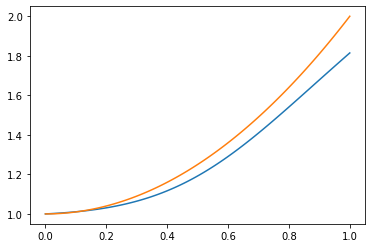

In [89]:
# True Solution (found analitically)
def true_solution(x):
  return x**2 + 1
X = np.linspace(0, 1, 100)
result = []
for i in X:
  result.append(g(i).numpy()[0][0][0])
S = true_solution(X)
plt.plot(X, result)
plt.plot(X, S)
plt.show()

In [106]:
n_input = 1
n_hidden_1 = 32
n_hidden_2 = 32
n_output = 1

In [108]:
input_shape = (1,)
N = tf.keras.Sequential([
                             tf.keras.layers.Dense(32,input_shape = input_shape),
                             tf.keras.layers.Activation("sigmoid"),
                             tf.keras.layers.Dense(32),
                             tf.keras.layers.Activation("sigmoid"),
                             tf.keras.layers.Dense(1),
                             tf.keras.layers.Activation("sigmoid")
])

In [109]:
N(tf.ones(1))
N.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                64        
                                                                 
 activation_1 (Activation)   (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 activation_2 (Activation)   (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
 activation_3 (Activation)   (None, 1)                 0         
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-traina

In [126]:
f0 = 1
g = lambda x,training: f0 + x*N(x,training = training)
f = lambda x: 2*x

In [128]:
def custom_loss(x):
  with tf.GradientTape() as tape:
    tape.watch(x)
    g_x = g(x,True)
    f_x = f(x)
  dx_gx = tape.gradient(g_x,x)
  print(dx_gx.shape)
  print(f_x.shape)
  return tf.sqrt(tf.reduce_mean((f_x - dx_gx)**2))

In [129]:
x = np.linspace(-1,1,10)
x = tf.cast(x,dtype = tf.float32)
loss = custom_loss(x)

(10,)
(10,)


In [132]:
def train_neural_network(x):
  Adam = tf.keras.optimizers.SGD(learning_rate = 0.01)
  trainable_variables = N.trainable_variables
  x = tf.cast(x,dtype = tf.float32)
  losses = []
  for ix in range(5000):
    with tf.GradientTape(persistent = True) as tape:
      tape.watch(x)
      tape.watch(trainable_variables)
      g_x = g(x,True)
      f_x = f(x)
      dx_g_x = tape.gradient(g_x,x)
      loss = tf.reduce_mean((f_x - dx_g_x)**2)
      tape.watch(loss)
    gradients = tape.gradient(loss, trainable_variables)
    Adam.apply_gradients(zip(gradients, trainable_variables))
    losses.append(loss.numpy())
    if ix%500 == 0:
      print(ix," turns completed")
      print(loss.numpy())
    
  

In [133]:
x = np.linspace(-1,1,100)
train_neural_network(x)

0  turns completed
1.3602693
500  turns completed
1.3602693
1000  turns completed
1.3602693
1500  turns completed
1.3602693


KeyboardInterrupt: ignored

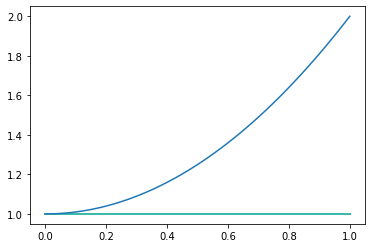

In [125]:
def true_solution(x):
  return x**2 + 1
X = np.linspace(0, 1, 100)

for i in X:
  result = g(X)
S = true_solution(X)
plt.plot(X, result)
plt.plot(X, S)
plt.show()

In [134]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [153]:
N = nn.Sequential(nn.Linear(1, 50), nn.Sigmoid(), nn.Linear(50,1, bias=False))

In [137]:
A = 0.
Psi_t = lambda x: A + x * N(x)
f = lambda x, Psi: torch.exp(-x / 5.0) * torch.cos(x) - Psi / 5.0

In [154]:
A = 1.
Psi_t = lambda x: A + x * N(x)
f = lambda x: 2*x

In [155]:
def loss(x):

    x.requires_grad = True
    outputs = Psi_t(x)
    Psi_t_x = torch.autograd.grad(outputs, x, grad_outputs=torch.ones_like(outputs),
                        create_graph=True)[0]

    return  torch.mean( ( Psi_t_x - f(x) )  ** 2)

In [156]:
optimizer = torch.optim.LBFGS(N.parameters())
#optimizer = torch.optim.Adam(N.parameters())

x = torch.Tensor(np.linspace(0, 2, 100)[:, None])

In [157]:
def closure():

    optimizer.zero_grad()
    l = loss(x)
    l.backward()
    
    return l

for i in range(10):
    optimizer.step(closure)

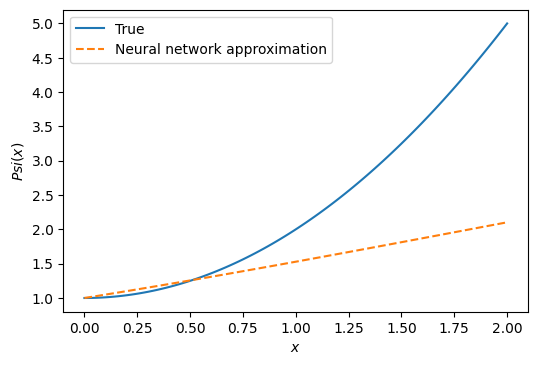

In [158]:
xx = np.linspace(0, 2, 100)[:, None]

with torch.no_grad():
    yy = Psi_t(torch.Tensor(xx)).numpy()
yt = xx**2 + 1
#yt = np.exp(-xx / 5.0) * np.sin(xx)

fig, ax = plt.subplots(dpi=100)
ax.plot(xx, yt, label='True')
ax.plot(xx, yy, '--', label='Neural network approximation')
ax.set_xlabel('$x$')
ax.set_ylabel('$Psi(x)$')
plt.legend(loc='best');
